# <font color=Magenta>RECON</font>N<font color=#990000>ECT</font> project - ae<font color=Magenta>R</font>osol n<font color=Magenta>E</font>w parti<font color=Magenta>C</font>le f<font color=Magenta>O</font>rmatio<font color=Magenta>N</font> aNd s<font color=#990000>E</font>a i<font color=#990000>C</font>e mel<font color=#990000>T</font>

*Report for the course “eScience Tools in Climate Science: Linking Observations with Modelling”*

**Student:** *Kei Tsuruhara, Stockholm University [kei2.8848@gmail.com]*

**Date:** *18.11.2022*

**Assistant:** *Dominic Heslin-Rees [Dominic.Heslin-Rees@aces.su.se] (Group 3)*

## Abstract

New particle formation (NPF) contribute to cloud condensation nuclei (CCN) globally and it's particularly important in the Arctic, where cloud properties are sensitive to the change in NPF. NPF events are thought to be affected by sea ice decline due to increase in biological activities during summer, but how and how much sea ice decline affects NPF events remains unclear. In this study, I use sea ice and chlorophyll concentration data as a proxy for phytoplankton from both satellite observations and a CMIP6 model to see the relationship between sea ice and biological activities. The trends in sea ice loss and chlorophyll concentration were analyzed and compared to each other. Also, I looked into model data to see if it represents those trends seen in observations. As a result, the clear relationship was not seen between these two in observations. There are some marine areas where sea ice didn't exist but chlorophyll increased greatly, so something other than sea ice decline might play a role here. In model data, the trend in sea ice decline betweeen wes not represented correctly. Further analyses with other variables and observations could be helpful to understand the discrepancy.

## Table of Contents
1. [Introduction](#intro)
1. [Methods](#methods)
    1. [Packages](#packages)
    1. [Datasets](#dataset)
    1. [Analysis methods](#methodology)
1. [Results](#results)
    1. [Current state](#current)
    1. [Trend analysis (observations)](#trend_obs)
    1. [Trend analysis (model)](#trend_mod)
1. [Discussion and Conclusion](#conclusion)
1. [Outlook](#outlook)
1. [Acknowledgements](#acknowledge)
1. [References](#references)

## 1. Introduction <a name="intro"></a>

Atmospheric aerosol particles can form in a process called new particle formation (NPF). It is estimated that about 45% of global cloud condensation nuclei (CCN) in the low-level cloud are derived from NPF (Merikanto et al., 2009). Particles formed via NPF events grow to become CCN, and this process is particularly important in the Arctic, where the background aerosol number concentration is very low and cloud properties are more sensitive to the change in NPF. 

Recent observations (e.g., England et al., 2021) have shown stronger warming in the Arctic than the global average, which is called Arctic amplification. The amplified warming is causing rapid sea ice decline in the Arctic, and this rapid trend is thought to affect aerosol particles in the Arctic. A study, for example, shows a striking correlation (r = −0.75) between monthly sea ice extent and nucleation events (Dall ́Osto et al., 2017). Other modeling studies have predicted that an increase in biological activity during summer, when temperature increases and sea ice decreases, leads to higher production and emissions of dimethylsulphide (DMS) from the sea surface (e.g., Galí et al., 2019). As a result, it is assumed that more frequent NPF events occur in the Arctic due to sea ice decline. However, the changing climate in the Arctic might also affect other things such as sea surface temperature and thus biological activity, cloud cover, wind direction, and so on. Thus, the correlation between sea ice decline and the frequency of NPF events might not be causation. It is essential to evaluate if declining sea ice is actually contributing to elevated NPF events in the Arctic and if other factors also play a role. 

In this study, we investigate how much NPF frequency is affected by biological activity in neighboring marine areas and if the regions unaffected by sea ice decline affect NPF events. I use satellite data, in-situ data at Zeppelin station, and CMIP6 model data. 

#### Research questions:
1. *Do we see an increase in biological activity and NPF events in observations and models?* 
1. *How is NPF frequency affected by increased biological activity in neighboring marine areas?*
1. *What is the effect of regions unaffected by sea ice decline on NPF?* 

## 2. Methods <a name="methods"></a>

### 2.A. Packages <a name="packages"></a>


In [93]:
# import s3fs
import xarray as xr
import urllib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
# import cartopy as cy
# from matplotlib.colors import LogNorm
# import matplotlib.path as mpath
import numpy as np
# import cartopy.mpl.ticker as cticker
import matplotlib.ticker as ticker
import pandas as pd
from scipy.stats import linregress
# import datetime as dt
import warnings
from shapely.errors import ShapelyDeprecationWarning
from pandas.errors import PerformanceWarning 
import scipy
from scipy import stats
# from matplotlib.ticker import MaxNLocator
import kei_functions as func

In [22]:
import gcsfs
import requests
import intake

In [4]:
%load_ext autoreload
%autoreload 2

### 2.B. Datasets <a name="datasets"></a>

#### OSI-SAF satellite data
Satellite sea ice concentration data (resolution: 25km) from Ocean and Sea Ice Satellite Application Facility (OSI-SAF) are used. In order to analyze the relationship with chlorophyll and NPF events, we used data from 2000 to 2017 in the summer months (May, June, and July), when the first peak was detected in the chlorophyll concentration.

#### ESACCI-OC satellite data
I use chlorophyll-A concentration data (resolution: 0.25 deg) from ESA CCI ocean colour chlorophyll (ESACCI-OC). Only summertime data in the period 2000-2017 are used. I use this satellite chlorophyll-A data as a proxy for biological, though it's not a perfect proxy.

#### MPI-ESM1-2-HR
The higher-resolution Max Planck Institute for Meteorology Earth System Model (MPI-ESM1-2) is used to see if it represents the trend in sea ice and chlorophyll concentrations in the Arctic that were seen in observations.

<!-- #### NPF frequency measured at Zeppelin station -->

### 2.C. Analysis methods <a name="methodology"></a>

#### Current state 
The latest state of sea ice and chlorophyll concentrations are shown for both observation and model, and validity and distributions were checked.

#### Trend analysis (observations) 
To see the decreasing trend in sea ice and the increasing trend of chlorophyll concentrations, I plotted the trend from 2000 to 2017 in the Arctic. Our group analyzed observational data from the Zeppelin station, so I focused on neighboring marine areas: the Greenland Sea and the Barents Sea. To see the sea ice trend, the slopes of sea ice and chlorophyll concentrations were calculated using a method of robust linear regression and were plotted on maps. Then, using the results of values of slopes, I plotted and compared the regression lines between the areas where the change in sea ice concentration is below -1 % in the study period (area B) and above -1 % (area A). 

#### Trend analysis (model)
I again conducted trend analyses to see if the model represents sea ice and chlorophyll trends. Then I compare the observations and the model, considering that the period in the model (2000-2014) is shorter than that of the observations (2000-2017).

## 3. Results <a name="results"></a>

### 3.A. Current state <a name="current"></a>

#### Observation

In [5]:
ice_ds_2017 = xr.open_dataset(f'data/sea_ice_conc/ice_conc_2017.nc')

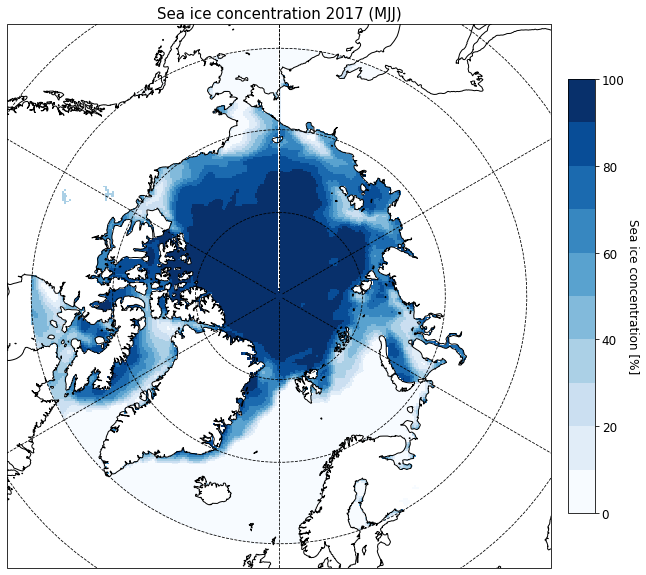

In [111]:
# Average sea ice concentration in summer 2017 (MJJ)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    warnings.filterwarnings("ignore", category=UserWarning)
    func.ice_one_year(months=[5,6,7], year=2017, title='Sea ice concentration 2017 (MJJ)', figname='ice_2017_mjj')

<b> Figure 1: </b> Averaged observational sea ice concentration [%] in summer 2017.

#### Model

In [23]:
fs = gcsfs.GCSFileSystem(token='anon', access='read_only')
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)

In [25]:
df_subset = col.df.query("activity_id=='CMIP' & experiment_id=='historical' & variable_id=='siconc' & source_id=='MPI-ESM1-2-HR'")

In [26]:
df_subset.zstore.values[-1]

'gs://cmip6/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/historical/r5i1p1f1/SImon/siconc/gn/v20190710/'

In [27]:
zstore = df_subset.zstore.values[-1]
mapper = fs.get_mapper(zstore)

# open using xarray
ds = xr.open_zarr(mapper, consolidated=True)

In [28]:
ds_assigned_coords = ds.assign_coords(longitude=(((ds.longitude + 180) % 360) - 180))#.sortby('lon')

In [33]:
ds_assigned_coords = ds_assigned_coords.rename({"longitude": "lon", "latitude": "lat"})

/Users/kei/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/kei/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Users/kei/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/Users/kei/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py

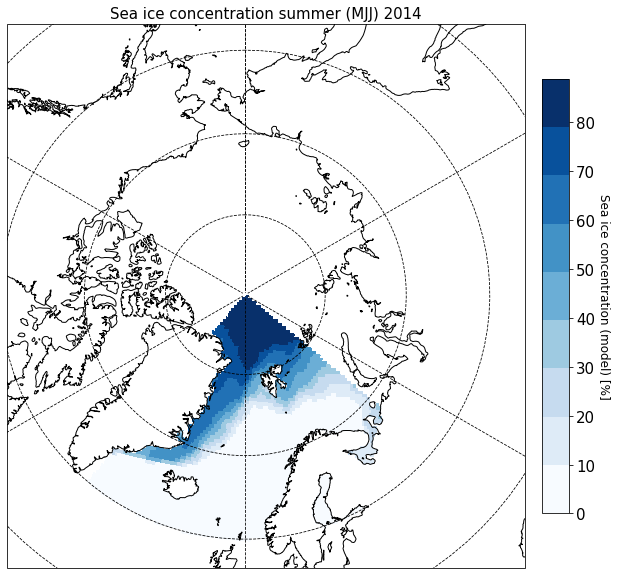

In [79]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    func.ice_model_one_year(ds=ds_assigned_coords, year=2014, title='Sea ice concentration summer (MJJ) 2014')

<b> Figure 2: </b> Averaged modeled sea ice concentration [%] in summer 2017. Latitude > 60°N, -40°E < Longitude < 50°E

In [7]:
# Get URL and open a dataset
with open("URLs.txt", "r") as f:
    lines = [line.rstrip('\n') for line in f]
urls = [x for x in lines if 'OBS-ESACCI-OC' in x]
xr_chloro = func.get_xr_from_url(urls[0],None)

In [8]:
xr_chloro_assigned_coords = xr_chloro.assign_coords(lon=(((xr_chloro.lon + 180) % 360) - 180)).sortby('lon')

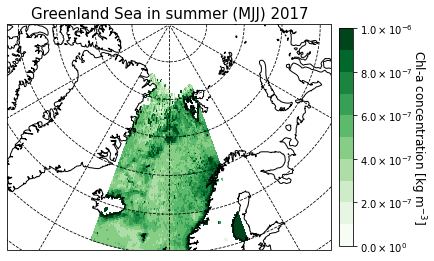

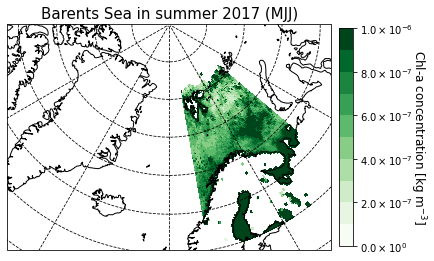

In [9]:
# Greenland Sea summer 2017
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    func.chl_one_year(xr_chloro_assigned_coords, lon_min=-20, lon_max=20, lat_min=60, lat_max=90, title='Greenland Sea in summer (MJJ) 2017', months=[5,6,7], year=2017, figname='greenland_2017.png')

# Barents Sea summer 2017 
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    func.chl_one_year(xr_chloro_assigned_coords, lon_min=10, lon_max=50, lat_min=60, lat_max=90, title='Barents Sea in summer 2017 (MJJ)', months=[5,6,7], year=2017, figname='barents_2017.png')


<b> Figure 3: </b> Averaged observational chlorophyll concentration [kg m$^{-3}$] in summer 2017 in Greenland Sea (above) and Barents Sea (below).

In [62]:
df_subset_chl = col.df.query("activity_id=='CMIP' & experiment_id=='historical' & variable_id=='chl' & source_id=='MPI-ESM1-2-HR'")

In [63]:
df_subset_chl.zstore.values[-1]

'gs://cmip6/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/historical/r6i1p1f1/Omon/chl/gn/v20190710/'

In [64]:
zstore = df_subset_chl.zstore.values[-1]
mapper = fs.get_mapper(zstore)

# open using xarray
ds_chl = xr.open_zarr(mapper, consolidated=True)

In [65]:
ds_assigned_coords_chl = ds_chl.assign_coords(longitude=(((ds_chl.longitude + 180) % 360) - 180))

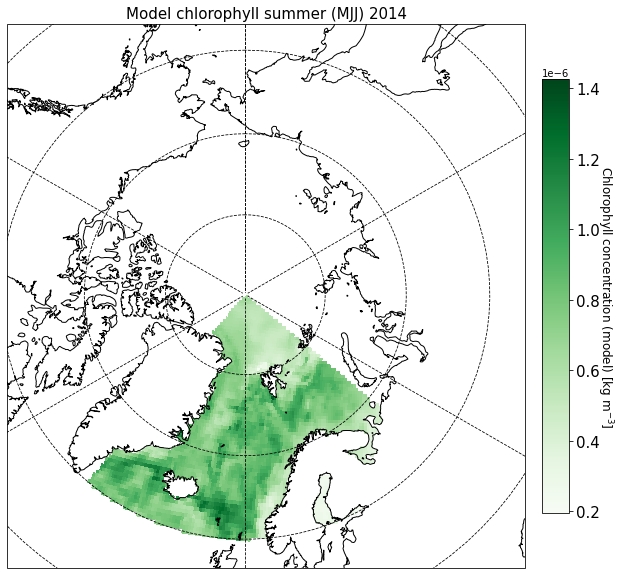

In [112]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    warnings.filterwarnings('ignore', category=PerformanceWarning)
    func.chl_model_one_year(ds_assigned_coords_chl, 2014, title='Model chlorophyll summer (MJJ) 2014', figname='model_chl_2014')

<b> Figure 4: </b> Averaged modeled chlorophyll concentration [kg m$^{-3}$] in summer 2017 in Greenland Sea (above) and Barents Sea (below).

Figure 1 shows the latest summertime sea ice concentration in the observation. We can see high concentrations in the north of Zeppelin station and lower concentrations in the south. Figure 2 shows a similar distribution of sea ice concentration in the model. Figure 3 shows the latest summertime chlorophyll concentration in the observation. We can see a relatively low and homogeneous trend in the Greenland Sea, whereas a high and heterogeneous trend in the Barents Sea. On the other hand, we cannot see the same trend in the model (figure 4).

### 3.B. Trend analysis (observations) <a name="trend_obs"></a>

#### Sea ice

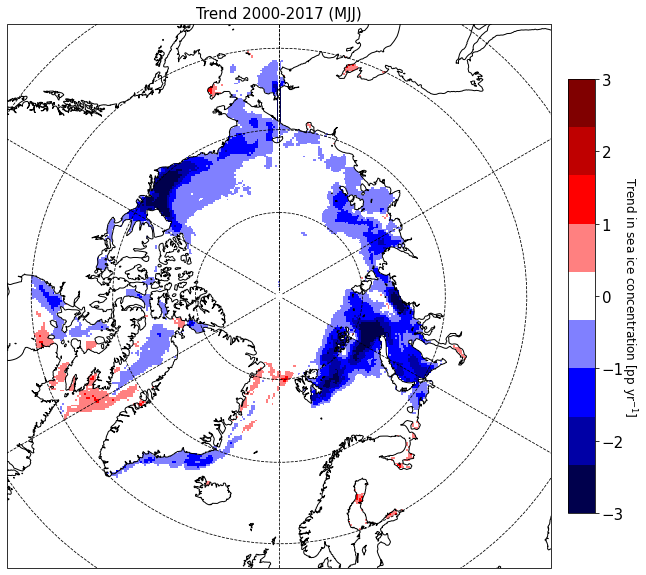

In [10]:
# Summer 2000-2017
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    warnings.filterwarnings("ignore", category=UserWarning)
    func.ice_trend(months=[5,6,7], years=[2000,2017], title='Trend 2000-2017 (MJJ)', figname='ice_2000_2017_mjj')

<b> Figure 5: </b> Spacial trend in observational sea ice concentration [pp yr$^{-1}$] in summer 2000-2017.

#### Chlorophyll

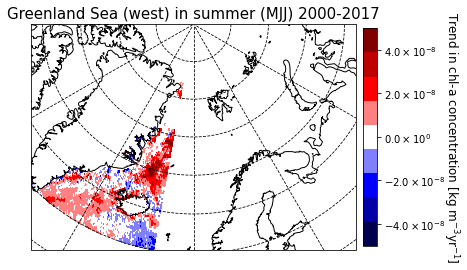

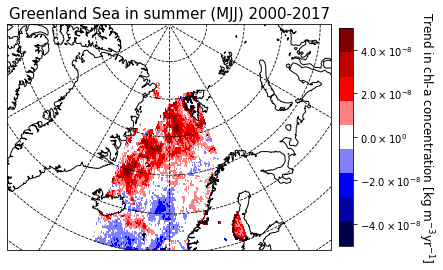

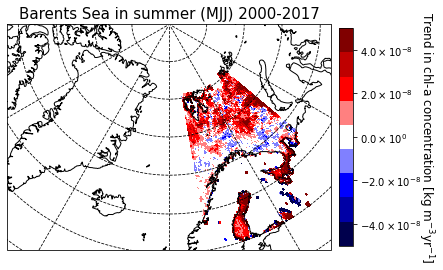

In [102]:
# Greenland Sea (west) summer absolute trend
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    func.absolute_trend(xr_chloro_assigned_coords, lon_min=-50, lon_max=-10, lat_min=60, lat_max=90, title='Greenland Sea (west) in summer (MJJ) 2000-2017', years=[2000,2017], months=[5,6,7], figname='absolute_greenland_2000_2017.png')
    
# Greenland Sea summer absolute trend
    func.absolute_trend(xr_chloro_assigned_coords, lon_min=-20, lon_max=20, lat_min=60, lat_max=90, title='Greenland Sea in summer (MJJ) 2000-2017', years=[2000,2017], months=[5,6,7], figname='absolute_greenland_2000_2017.png')
    
# Barents Sea summer absolute trend
    func.absolute_trend(xr_chloro_assigned_coords, lon_min=10, lon_max=50, lat_min=60, lat_max=90, title='Barents Sea in summer (MJJ) 2000-2017', years=[2000,2017], months=[5,6,7], figname='absolute_barents_2000_2017.png')

<b> Figure 6: </b> Spacial absolute trend in observational chlorophyll concentration [kg m$^{-3}$ yr$^{-1}$] in summer 2000-2017 in Greenland Sea (top and middle) and Barents Sea (bottom).

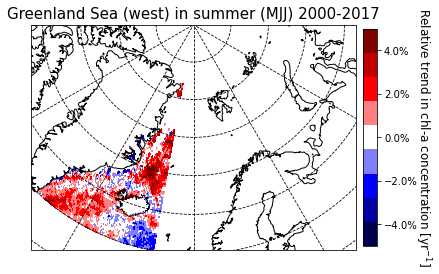

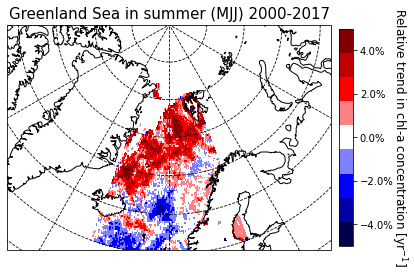

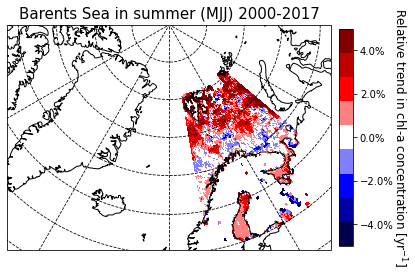

In [104]:
# Greenland Sea (west) summer relative trend
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    func.relative_trend(xr_chloro_assigned_coords, lon_min=-50, lon_max=-10, lat_min=60, lat_max=90, title='Greenland Sea (west) in summer (MJJ) 2000-2017', years=[2000,2017], months=[5,6,7], figname='relative_greenland_2000_2017.png')
    
# Greenland Sea summer relative trend
    func.relative_trend(xr_chloro_assigned_coords, lon_min=-20, lon_max=20, lat_min=60, lat_max=90, title='Greenland Sea in summer (MJJ) 2000-2017', years=[2000,2017], months=[5,6,7], figname='relative_greenland_2000_2017.png')
    
# Barents Sea summer relative trend
    func.relative_trend(xr_chloro_assigned_coords, lon_min=10, lon_max=50, lat_min=60, lat_max=90, title='Barents Sea in summer (MJJ) 2000-2017', years=[2000,2017], months=[5,6,7], figname='relative_barents_2000_2017.png')

<b> Figure 7: </b> Spacial absolute trend in observational chlorophyll concentration [yr$^{-1}$] in summer 2000-2017 in Greenland Sea (top and middle) and Barents Sea (bottom).

#### Yearly trend

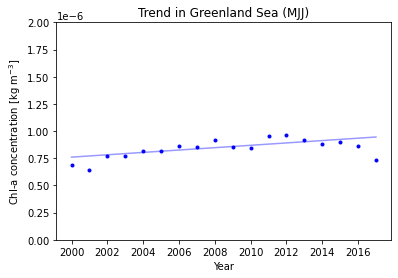

In [14]:
# Greenland Sea summer time series 2000-2017
func.plot_chl_time_series(xr_chloro_assigned_coords, lon_min=-20, lon_max=20, lat_min=60, lat_max=90, months=[5,6,7], years=[2000,2017], ylim=[0, 2*10**(-6)], title='Trend in Greenland Sea (MJJ)')

<b> Figure 8: </b> Yearly trend in averaged chlorophyll concentration in Greenland Sea.

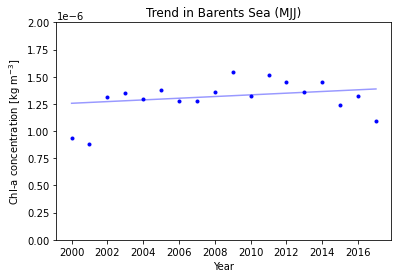

In [15]:
# Barents Sea summer time series 2000-2017
func.plot_chl_time_series(xr_chloro_assigned_coords, lon_min=10, lon_max=50, lat_min=60, lat_max=90, months=[5,6,7], years=[2000,2017], ylim=[0, 2*10**(-6)], title='Trend in Barents Sea (MJJ)')

<b> Figure 9: </b> Yearly trend in averaged chlorophyll concentration in Barents Sea.

#### Comparison between area A and area B

In [19]:
# Get the sea ice trend in 432*432 grid cells
slope_2d = func.ice_slope_2d_432(months=[5,6,7], years=[2000,2017])

In [20]:
# Get lat and lon of each grid cell of area A and area B separetely
decline_coords = func.get_coords_from_trend(slope_2d, -1)

In [21]:
# Create a df list for the chlorophyll trend in area A and area B in Barents Sea
df_list_barents = func.xr_to_trend_df(xr_chl=xr_chloro_assigned_coords, lon_min=10, lon_max=50, lat_min=60, lat_max=90, months=[5,6,7], years=[2000,2017], decline_coords=decline_coords)

In [26]:
# Create a df list for the chlorophyll trend in area A and area B in Greenland Sea
df_list_greenland = func.xr_to_trend_df(xr_chl=xr_chloro_assigned_coords, lon_min=-20, lon_max=20, lat_min=60, lat_max=90, months=[5,6,7], years=[2000,2017], decline_coords=decline_coords)

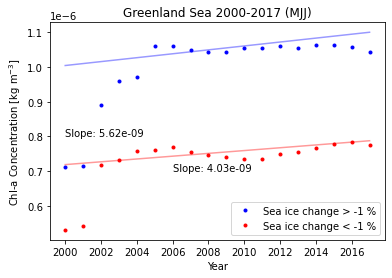

In [25]:
# # Trend in chlorophyll concentration in Greenland Sea
func.df_to_plot(df_above=df_list_greenland[1], df_below=df_list_greenland[0], confidence=0.95, title='Greenland Sea 2000-2017 (MJJ)', label_below='Sea ice change < -1 %', label_above='Sea ice change > -1 %')

<b> Figure 10: </b> Chlorophyll trend comparison between area A and area B in Greenland Sea.

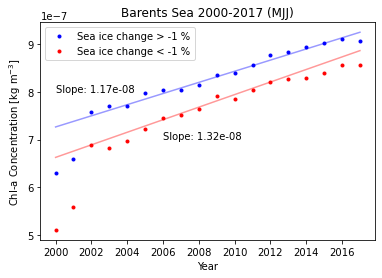

In [24]:
# Trend in chlorophyll concentration in Barents Sea
func.df_to_plot(df_above=df_list_barents[1], df_below=df_list_barents[0], confidence=0.95, title='Barents Sea 2000-2017 (MJJ)', label_below='Sea ice change < -1 %', label_above='Sea ice change > -1 %')

<b> Figure 11: </b> Chlorophyll trend comparison between area A and area B in Barents Sea.

Figure 5 shows the spatial trend in sea ice concentration in 2000-2017. We can see a solid increasing trend in the Barents Sea in the east of Zeppelin, a slight increase between Greenland and Svalbard, and a decreasing trend on the east coast of Greenland. Figures 6 and 7 show the absolute spatial trend (figure 6) and the relative trend (figure 7) in chlorophyll concentration. Both show mixed trends in the Greenland Sea and the Barents Sea, but we can see a more increasing trend around Zeppelin. Figures 8 and 9 show the yearly trend in average chlorophyll concentration in the Greenland Sea and the Barents Sea. In both seas, we see a slight increase over time. Figures 10 and 11 show the comparison of the trend between area A and area B. In these plots, there is no significant difference between the two areas. However, compared to the Greenland Sea, the Barents Sea shows steeper slopes, which means chlorophyll concentration is increasing more rapidly in the Barents Sea.

### 3.C. Trend analysis (model) <a name="trend_mod"></a>

#### Sea ice

/Users/kei/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexing.py:1380: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]


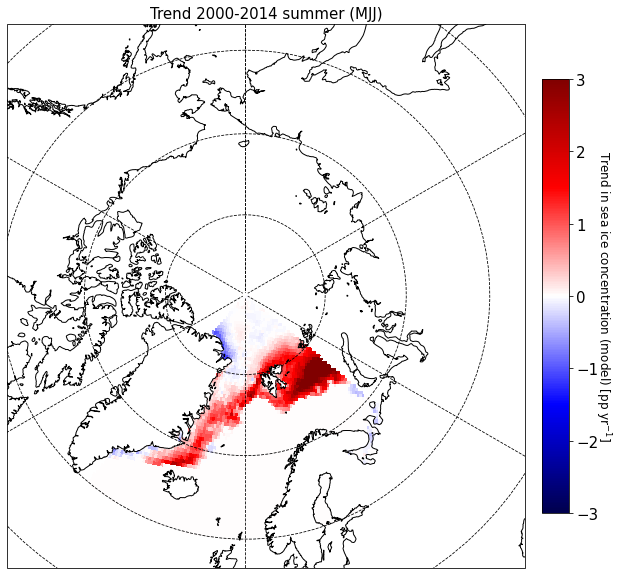

In [94]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    warnings.filterwarnings('ignore', category=PerformanceWarning)
    func.ice_model_trend(ds=ds_assigned_coords, years=[2000, 2014], months=[5,6,7], title='Trend 2000-2014 summer (MJJ)', figname='model_ice_2000_2014_mjj.png')

<b> Figure 12: </b> Spacial trend in modeled sea ice concentration [pp yr$^{-1}$] in summer 2000-2014.

#### Chlorophyll

/Users/kei/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexing.py:1380: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]
/Users/kei/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array

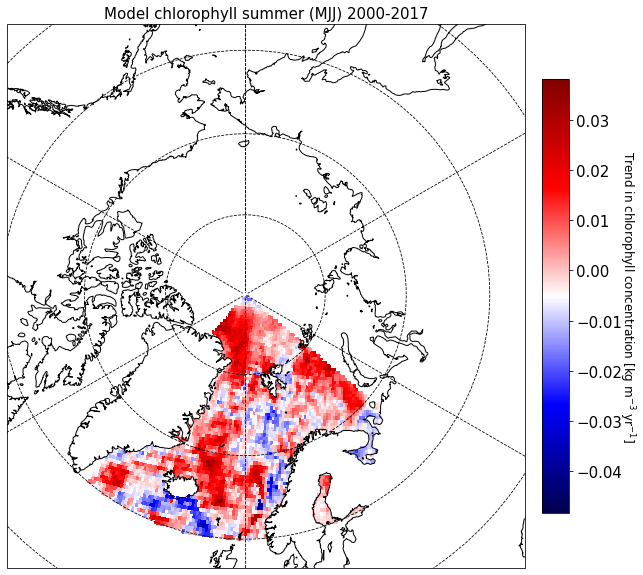

In [88]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    warnings.filterwarnings('ignore', category=pd.errors.PerformanceWarning)
    func.chl_model_trend(ds_assigned_coords_chl, years=[2000, 2014], months=[5,6,7], title='Model chlorophyll summer (MJJ) 2000-2017', figname='model_chl_2000_2014')

<b> Figure 13: </b> Spacial absolute trend in modeled chlorophyll concentration [kg m$^{-3}$ yr$^{-1}$] in summer 2000-2014.

/Users/kei/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexing.py:1380: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]
/Users/kei/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array

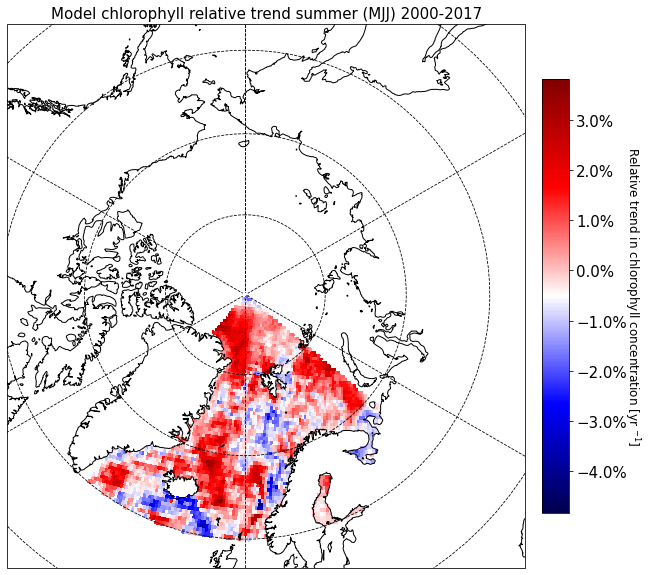

In [96]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    warnings.filterwarnings('ignore', category=PerformanceWarning)
    func.chl_model_relative_trend(ds=ds_assigned_coords_chl, years=[2000,2014], months=[5,6,7], title='Model chlorophyll relative trend summer (MJJ) 2000-2017', figname='model_chl_relative_2000_2014')

<b> Figure 14: </b> Spacial relative trend in modeled chlorophyll concentration [yr$^{-1}$] in summer 2000-2014.

<!-- ### 3.E. Sea ice trend vs NPF trend -->

In [115]:
# I don't have the data yet
# npf_df = pd.read_csv('data/df_yearly_count_clusters.csv')

Figure 12 shows a spatial trend in modeled sea ice concentration from 2000 to 2014. We can see a completely different trend from that in the observation (figure 5). We can see increasing trends in both the Greenland Sea and the Barents Sea. Figures 13 and 14 show absolute and relative trends in modeled chlorophyll concentration. We can see a mixed trend in both plots, which is quite similar to that in the observation (figures 6 and 7). For example, both the model and observation show a decreasing trend in the south of Iceland. 

## 4. Discussion and Conclusion <a name="conclusion"></a> <a name="discussion"></a>

In the satellite and model data, we saw an increase in chlorophyll concentration, especially in the marine area around Zeppelin, despite a decrease in some other areas. However, we did not see any clear differences in the areas where sea ice decline was pronounced. Between area A and area B, there was no significant difference, which implies that the decline in sea ice concentration in the summer did not increase chlorophyll concentration there. In addition, we saw some areas (the Greenland Sea, for example) where sea ice does not exist, but chlorophyll concentration increased. That might imply that something other than sea ice decline plays a role here. However, that does not necessarily mean that sea ice decline has nothing to do with chlorophyll concentration or the activity of phytoplankton because it might affect areas downwind. Thus, we could see this relationship more clearly if we analyze airmass trajectories. Also, as mentioned in 3.B., the slope of the increasing chlorophyll concentration in the Barents Sea seemed steeper than that in the Greenland Sea. This difference might be due to the great decline of sea ice in the Barents Sea (figure 5). \
The model I used here failed to represent the sea ice loss from 2000 to 2014, whereas the chlorophyll trend was quite similar to what we saw in observational data. The reason why modeled sea ice trend seems too different from that in observational data is unclear, but it would be interesting to compare it with other variables or with other models.

## 6. Acknowledgements <a name="acknowledge"></a>

I would like to thank the rest of group 3 (Lovisa and our assistant Dominic) for always being active and positive in the discussion and for helping me all the time with the report. Thank you to Theodore for trying to help our group with handling and processing the data correctly. Thank you to Ada for providing helpful information on processing and visualizing the data correctly. Thank you to Paul and Michael for organizing this fantastic course. Thank you to all the other students and assistants for making my two weeks at Tjärnö extremely fun. 

## 7. References <a name="references"></a>

- England, M. R., Eisenman, I., Lutsko, N. J., & Wagner, T. J. (2021). The recent emergence of Arctic Amplification. Geophysical Research Letters, 48(15), e2021GL094086.
- Beddows, D. C. S., Tunved, P., Krejci, R., Ström, J., Hansson, H. C., Yoon, Y. J., ... & Harrison, R. M. (2017). Arctic sea ice melt leads to atmospheric new particle formation. Scientific reports, 7(1), 1-10.
- Zhang, M., Marandino, C. A., Yan, J., Wu, Y., Park, K., Sun, H., ... & Xu, S. (2021). Unravelling Surface Seawater DMS Concentration and Sea‐To‐Air Flux Changes After Sea Ice Retreat in the Western Arctic Ocean. Global Biogeochemical Cycles, 35(6), e2020GB006796.